Upload Kaggle file for API

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bradsahw","key":"f6a93f5b1fbe6448cd15de33d0fe2b52"}'}

Make sure connection to Kaggle is working

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets list

ref                                                            title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
carlmcbrideellis/llm-7-prompt-training-dataset                 LLM: 7 prompt training dataset                      41MB  2023-11-15 07:32:56            810         75  1.0              
thedrcat/daigt-proper-train-dataset                            DAIGT Proper Train Dataset                         119MB  2023-11-05 14:03:25            922        107  1.0              
iamsouravbanerjee/customer-shopping-trends-dataset             Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          30272        570  1.0              
joebeachcapital/30000-spotify-songs                            30000 S

Download the dataset from kaggle

In [ ]:
!kaggle datasets download -d andrewmvd/car-plate-detection

 98% 198M/203M [00:03<00:00, 72.1MB/s]
100% 203M/203M [00:03<00:00, 66.5MB/s]


In [ ]:
!unzip car-plate-detection.zip

Archive:  car-plate-detection.zip
  inflating: annotations/Cars0.xml   
  inflating: annotations/Cars1.xml   
  inflating: annotations/Cars10.xml  
  inflating: annotations/Cars100.xml  
  inflating: annotations/Cars101.xml  
  inflating: annotations/Cars102.xml  
  inflating: annotations/Cars103.xml  
  inflating: annotations/Cars104.xml  
  inflating: annotations/Cars105.xml  
  inflating: annotations/Cars106.xml  
  inflating: annotations/Cars107.xml  
  inflating: annotations/Cars108.xml  
  inflating: annotations/Cars109.xml  
  inflating: annotations/Cars11.xml  
  inflating: annotations/Cars110.xml  
  inflating: annotations/Cars111.xml  
  inflating: annotations/Cars112.xml  
  inflating: annotations/Cars113.xml  
  inflating: annotations/Cars114.xml  
  inflating: annotations/Cars115.xml  
  inflating: annotations/Cars116.xml  
  inflating: annotations/Cars117.xml  
  inflating: annotations/Cars118.xml  
  inflating: annotations/Cars119.xml  
  inflating: annotations/Cars12.xm

Organize Kaggle dataset

Create a folder called database in the content folder and move the annotations and images folder into the database folder

Import nessasary libraries

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import cv2
import os
import glob

Check database files

In [ ]:
import os
for dirname, _, filenames in os.walk('../content/database'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../content/database/annotations/Cars245.xml
../content/database/annotations/Cars307.xml
../content/database/annotations/Cars343.xml
../content/database/annotations/Cars362.xml
../content/database/annotations/Cars5.xml
../content/database/annotations/Cars315.xml
../content/database/annotations/Cars371.xml
../content/database/annotations/Cars255.xml
../content/database/annotations/Cars368.xml
../content/database/annotations/Cars140.xml
../content/database/annotations/Cars178.xml
../content/database/annotations/Cars152.xml
../content/database/annotations/Cars298.xml
../content/database/annotations/Cars300.xml
../content/database/annotations/Cars309.xml
../content/database/annotations/Cars325.xml
../content/database/annotations/Cars281.xml
../content/database/annotations/Cars418.xml
../content/database/annotations/Cars165.xml
../content/database/annotations/Cars28.xml
../content/database/annotations/Cars112.xml
../content/database/annotations/Cars414.xml
../content/database/annotations/Car

In [ ]:
IMAGE_SIZE = 224

X will contain all images

In [ ]:
img_dir = "../content/database/images"
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
files.sort()
X=[]
for f1 in files:
    img = cv2.imread(f1)
    img = cv2.resize(img, (IMAGE_SIZE,IMAGE_SIZE))
    X.append(np.array(img))

Resize al the boxes to fit the resized images

In [ ]:
from lxml import etree
def resizeannotation(f):
    tree = etree.parse(f)
    for dim in tree.xpath("size"):
        width = int(dim.xpath("width")[0].text)
        height = int(dim.xpath("height")[0].text)
    for dim in tree.xpath("object/bndbox"):
        xmin = int(dim.xpath("xmin")[0].text)/(width/IMAGE_SIZE)
        ymin = int(dim.xpath("ymin")[0].text)/(height/IMAGE_SIZE)
        xmax = int(dim.xpath("xmax")[0].text)/(width/IMAGE_SIZE)
        ymax = int(dim.xpath("ymax")[0].text)/(height/IMAGE_SIZE)
    return [int(xmax), int(ymax), int(xmin), int(ymin)]

In [ ]:
path = '../content/database/annotations'
text_files = ['../content/database/annotations/'+f for f in sorted(os.listdir(path))]
y=[]
for i in text_files:
    y.append(resizeannotation(i))

Check resizing

In [ ]:
print(resizeannotation("../content/database/annotations/Cars147.xml")) # should be [188, 141, 101, 104]
print(y[0]) # should be [187, 144, 101, 104]

print("\n")

print(np.array(X).shape) # (433, 224, 224, 3)
print(np.array(y).shape) # (433, 4)

[188, 141, 101, 104]
[187, 144, 101, 104]


(433, 224, 224, 3)
(433, 4)


Display some images from the database

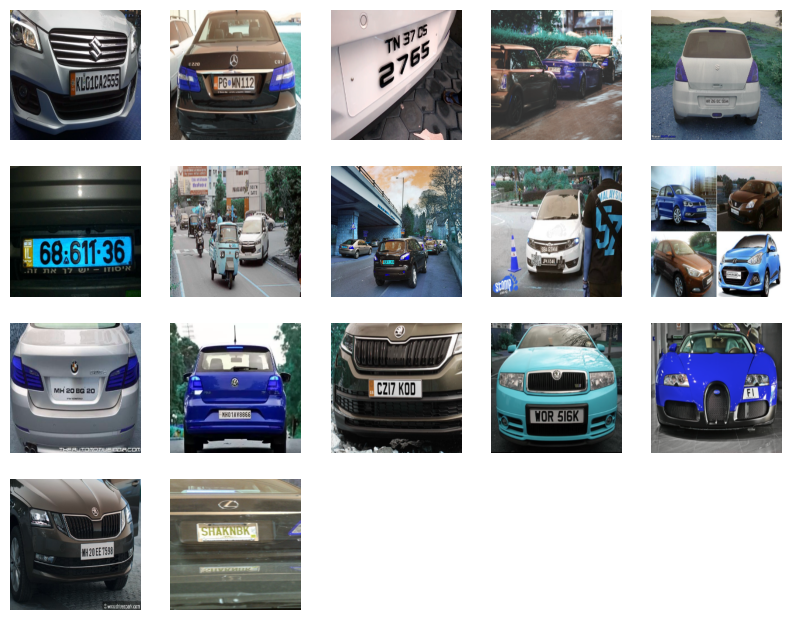

In [ ]:
plt.figure(figsize=(10,20))
for i in range(0,17) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i])

Draw box on some of the images

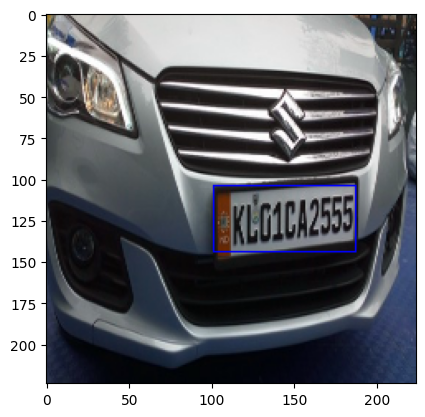

In [ ]:
image = cv2.rectangle(X[0],(y[0][0],y[0][1]),(y[0][2],y[0][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

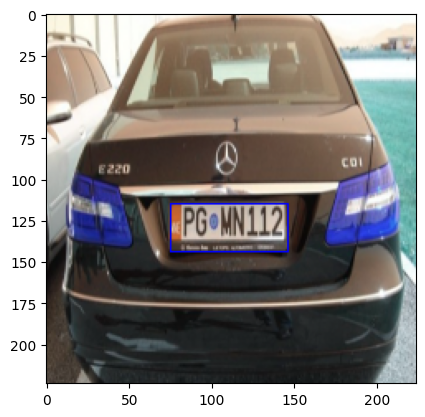

In [ ]:
image = cv2.rectangle(X[1],(y[1][0],y[1][1]),(y[1][2],y[1][3]),(0, 0, 255))
plt.imshow(image)
plt.show()

In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
X = X / 255
y = y / 255

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

Convolutionnal Neural Network

In [ ]:
from keras.models import Sequential

from keras.layers import Dense, Flatten

from keras.applications.vgg16 import VGG16

Create the model

In [ ]:
model = Sequential()
model.add(VGG16(weights="imagenet", include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.layers[-6].trainable = False

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 17951108 (68.48 MB)
Trainable params: 3236

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
train = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32, verbose=1)

Epoch 1/50
10/10 [==============================] - 244s 24s/step - loss: 0.0716 - accuracy: 0.3408 - val_loss: 0.0568 - val_accuracy: 0.5429
Epoch 2/50
10/10 [==============================] - 240s 24s/step - loss: 0.0530 - accuracy: 0.4920 - val_loss: 0.0492 - val_accuracy: 0.3429
Epoch 3/50
10/10 [==============================] - 212s 21s/step - loss: 0.0439 - accuracy: 0.6367 - val_loss: 0.0469 - val_accuracy: 0.6000
Epoch 4/50
10/10 [==============================] - 211s 21s/step - loss: 0.0412 - accuracy: 0.7653 - val_loss: 0.0435 - val_accuracy: 0.4857
Epoch 5/50
10/10 [==============================] - 231s 23s/step - loss: 0.0391 - accuracy: 0.7492 - val_loss: 0.0433 - val_accuracy: 0.7714
Epoch 6/50
10/10 [==============================] - 209s 21s/step - loss: 0.0379 - accuracy: 0.7974 - val_loss: 0.0420 - val_accuracy: 0.7429
Epoch 7/50
10/10 [==============================] - 232s 24s/step - loss: 0.0358 - accuracy: 0.8746 - val_loss: 0.0322 - val_accuracy: 0.7429
Epoch 

~3h

In [ ]:
model.save('my_model.h5', overwrite=True)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model.save('my_model.keras')

In [ ]:
# Test
scores = model.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 83.91%


In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

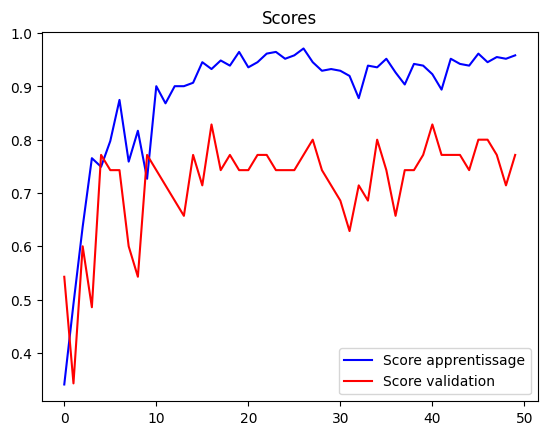

In [ ]:
plot_scores(train)

Detection

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test,steps=int(100))

print("Test results \n Loss:",test_loss,'\n Accuracy',test_accuracy)

 87/100 [=========================>....] - ETA: 8s - loss: 0.0061 - accuracy: 0.8391

100/100 [==============================] - 54s 539ms/step - loss: 0.0061 - accuracy: 0.8391
Test results 
 Loss: 0.0061246855184435844 
 Accuracy 0.8390804529190063


In [ ]:
 y_cnn = model.predict(X_test)

3/3 [==============================] - 56s 18s/step


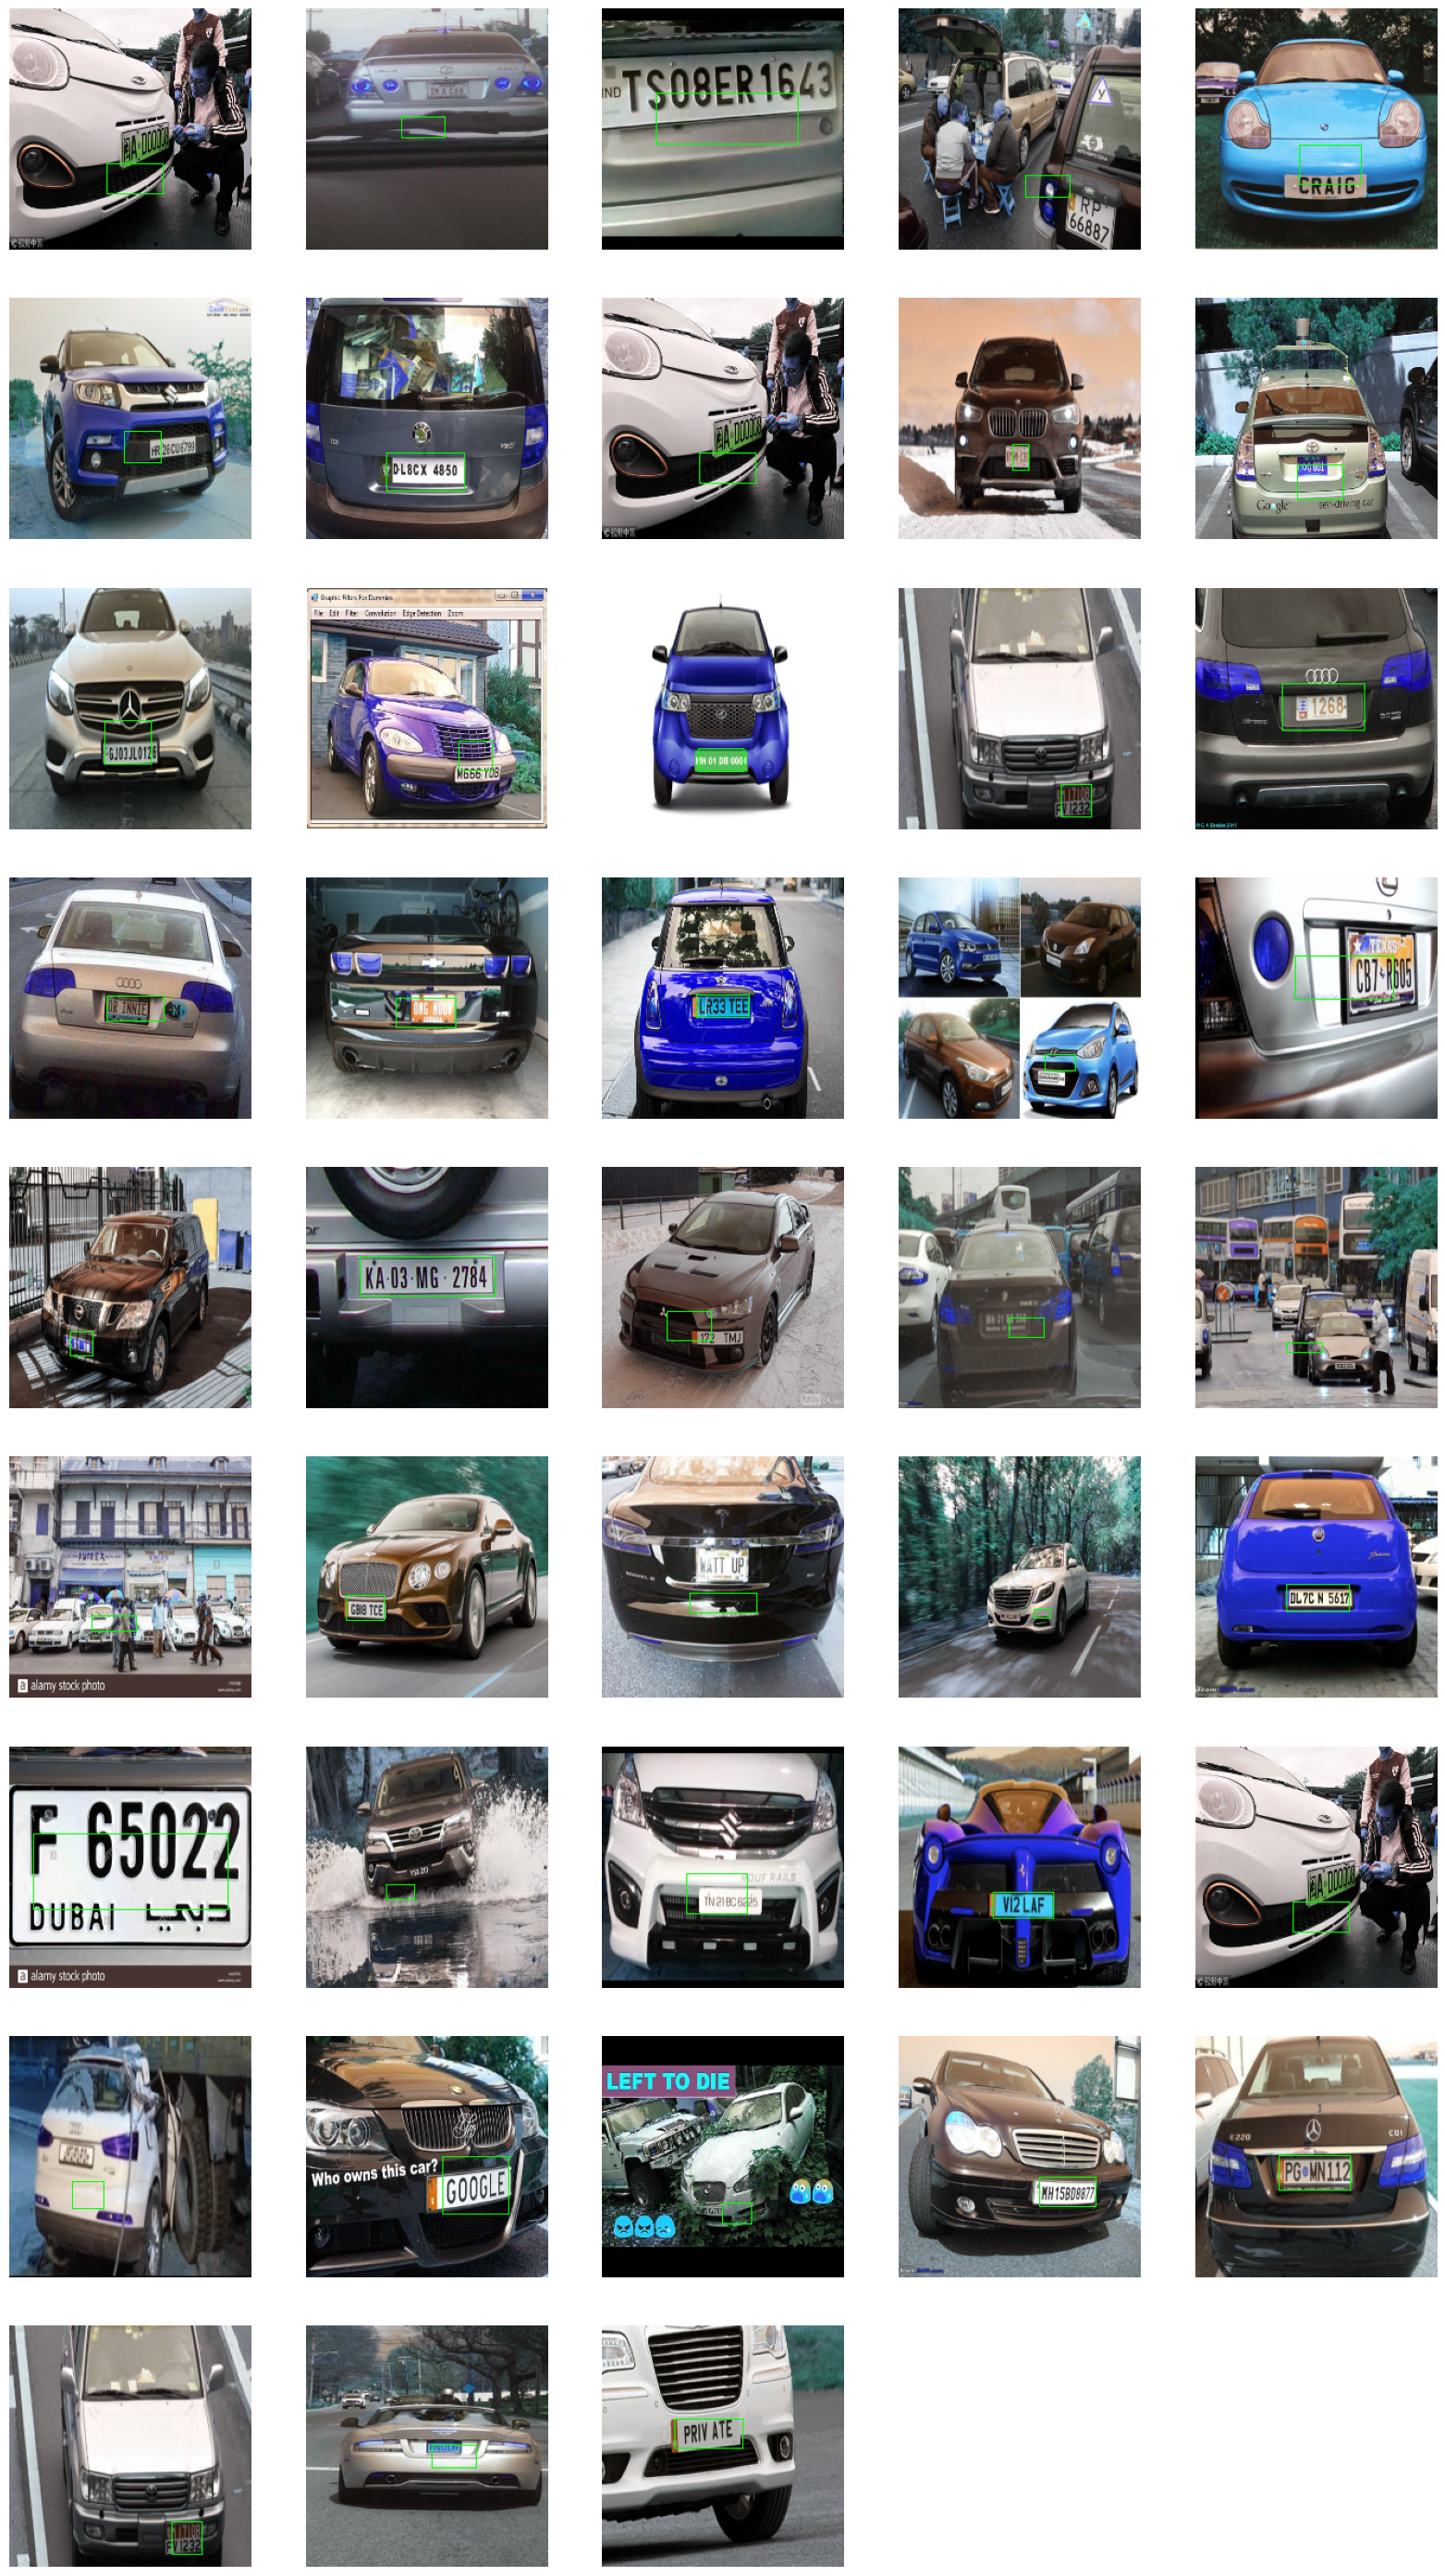

In [ ]:
plt.figure(figsize=(20,40))
for i in range(0,43) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    ny = y_cnn[i]*255
    image = cv2.rectangle(X_test[i],(int(ny[0]),int(ny[1])),(int(ny[2]),int(ny[3])),(0, 255, 0))
    plt.imshow(image)